# Microsoft Studios Preliminary Analysis

### A temporal and fiscal examination

#### Harrison Carter
#### Joseph Mata
#### 2022-06-02
#### NYC-DS-051622

## Overview

The hypothetical Microsoft Studios is starting their streaming platform and looking for any advice they can get. This project uses datasets gathered in 2019 from four different online databases to make specific reccomendations for the upcoming platform and their future endeavors in film.

In [412]:
#import relevant modules
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import datetime
import warnings

In [413]:
# Disable pandas warnings for readability
warnings.simplefilter(action='ignore', category=FutureWarning)

In [414]:
# gather datasets
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# connect to SQL and save dataframe
conn = sqlite3.connect('zippedData/im.db')
imdb = pd.read_sql('''
    SELECT *
    FROM movie_basics; 
    ''',conn)

# tab separated values, use tab as delimiter/sep
rtinf = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t') 

# encoding must be in 'latin1' to parse irregular characters
rtrev = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding = 'latin1')

tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [415]:
# merge datasets
bi = bom.merge(imdb, how='inner', left_on = 'title', right_on = 'original_title')
bit = bi.merge(tmdb, how='inner', left_on='title', right_on='title')
bitt = bit.merge(tn, how='inner', left_on='original_title_x', right_on='movie')

In [416]:
#Drop duplicates
bit = bit.drop_duplicates(['primary_title'])
bitt = bitt.drop_duplicates(['primary_title'])

In [417]:
# remove unwanted characters
bitt['foreign_gross'] = bitt['foreign_gross'].str.replace(',', '')
bitt['foreign_gross'] = bitt['foreign_gross'].str.replace('$', '')
bitt['foreign_gross'] = bitt['foreign_gross'].astype(float)
bitt['worldwide_gross'] = bitt['worldwide_gross'].str.replace('$', '')
bitt['worldwide_gross'] = bitt['worldwide_gross'].str.replace(',', '')
bitt['worldwide_gross'] = bitt['worldwide_gross'].astype(float)
bitt['production_budget'] = bitt['production_budget'].str.replace('$', '')
bitt['production_budget'] = bitt['production_budget'].str.replace(',', '')
bitt['production_budget'] = bitt['production_budget'].astype(float)

In [418]:
bitt.head()

,title,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title_x,start_year,runtime_minutes,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,...,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,...,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010",Inception,160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,...,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,...,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,...,28.515,2010-05-07,6.8,12368,15,"May 7, 2010",Iron Man 2,170000000.0,"$312,433,331",6.211564e+08


In [419]:
# Find the average production budget and worldwide gross for each major genre
com = bitt[bitt['genres'].str.contains('Comedy')==True]
com_bud = com['production_budget'].mean()
com_g = com['worldwide_gross'].mean()

dra = bitt[bitt['genres'].str.contains('Drama')==True]
dra_bud = dra['production_budget'].mean()
dra_g = dra['worldwide_gross'].mean()

act = bitt[bitt['genres'].str.contains('Action')==True]
act_bud = act['production_budget'].mean()
act_g = act['worldwide_gross'].mean()

sci = bitt[bitt['genres'].str.contains('Sci')==True]
sci_bud = sci['production_budget'].mean()
sci_g = com['worldwide_gross'].mean()

ani = bitt[bitt['genres'].str.contains('Animation')==True]
ani_bud = ani['production_budget'].mean()
ani_g = ani['worldwide_gross'].mean()

rom = bitt[bitt['genres'].str.contains('Romance')==True]
rom_bud = rom['production_budget'].mean()
rom_g = rom['worldwide_gross'].mean()

doc = bitt[bitt['genres'].str.contains('Documentary')==True]
doc_bud = doc['production_budget'].mean()
doc_g = doc['worldwide_gross'].mean()

wes = bitt[bitt['genres'].str.contains('Western')==True]
wes_bud = wes['production_budget'].mean()
wes_g = wes['worldwide_gross'].mean()

hor = bitt[bitt['genres'].str.contains('Horror')==True]
hor_bud = hor['production_budget'].mean()
hor_g = hor['worldwide_gross'].mean()

adv = bitt[bitt['genres'].str.contains('Adventure')==True]
adv_bud = adv['production_budget'].mean()
adv_g = adv['worldwide_gross'].mean()

mys = bitt[bitt['genres'].str.contains('Mystery')==True]
mys_bud = mys['production_budget'].mean()
mys_g = mys['worldwide_gross'].mean()

# Initialize list of genres in question
gen = ['Comedy','Drama','Action','Sci-Fi','Animation','Romance','Documentary','Western','Horror','Adventure','Mystery']
gen_bud = [com_bud,dra_bud,act_bud,sci_bud,ani_bud,rom_bud,doc_bud,wes_bud,hor_bud,adv_bud,mys_bud]
gen_g = [com_g,dra_g,act_g,sci_g,ani_g,rom_g,doc_g,wes_g,hor_g,adv_g,mys_g]

In [420]:
# Create dataframe containing average budget and average worldwide gross per genre
genred = {'Genre':  gen,
        'Budget': gen_bud,
        'Worldwide Gross': gen_g}

gendf = pd.DataFrame(genred)

print (gendf)

          Genre        Budget  Worldwide Gross
0        Comedy  4.266369e+07     1.482201e+08
1         Drama  2.828507e+07     8.162471e+07
2        Action  8.643283e+07     2.672391e+08
3        Sci-Fi  9.780477e+07     1.482201e+08
4     Animation  1.029217e+08     3.942728e+08
5       Romance  2.176330e+07     7.090539e+07
6   Documentary  1.233333e+07     5.888093e+07
7       Western  6.243750e+07     1.232272e+08
8        Horror  2.055650e+07     8.425086e+07
9     Adventure  1.108069e+08     3.723460e+08
10      Mystery  2.627189e+07     1.027942e+08


In [421]:
# Melt dataframe to correct format for catplot
gendfm = pd.melt(gendf,id_vars='Genre')
gendfm

,Genre,variable,value
0,Comedy,Budget,4.266369e+07
1,Drama,Budget,2.828507e+07
2,Action,Budget,8.643283e+07
3,Sci-Fi,Budget,9.780477e+07
4,Animation,Budget,1.029217e+08
5,Romance,Budget,2.176330e+07
6,Documentary,Budget,1.233333e+07
7,Western,Budget,6.243750e+07
8,Horror,Budget,2.055650e+07
9,Adventure,Budget,1.108069e+08


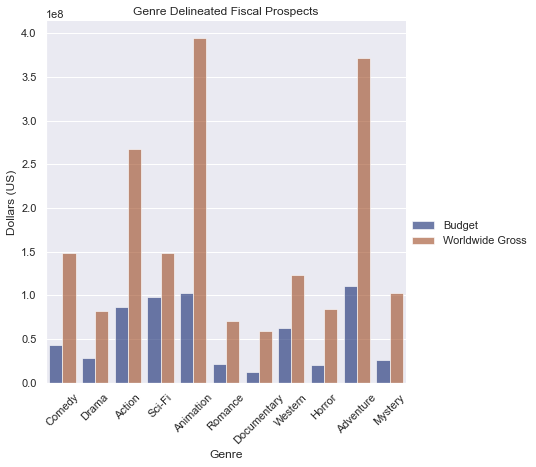

In [422]:
g = sns.catplot(
    data=gendfm, kind="bar",
    x="Genre", y="value", hue="variable",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.set_axis_labels("Genre", "Dollars (US)")
plt.xticks(rotation=45)
plt.title('Genre Delineated Fiscal Prospects')
g.legend.set_title("")

In [423]:
#Isolate animated films
anima = bitt[bitt['genres'].str.contains('Animation')==True]

''

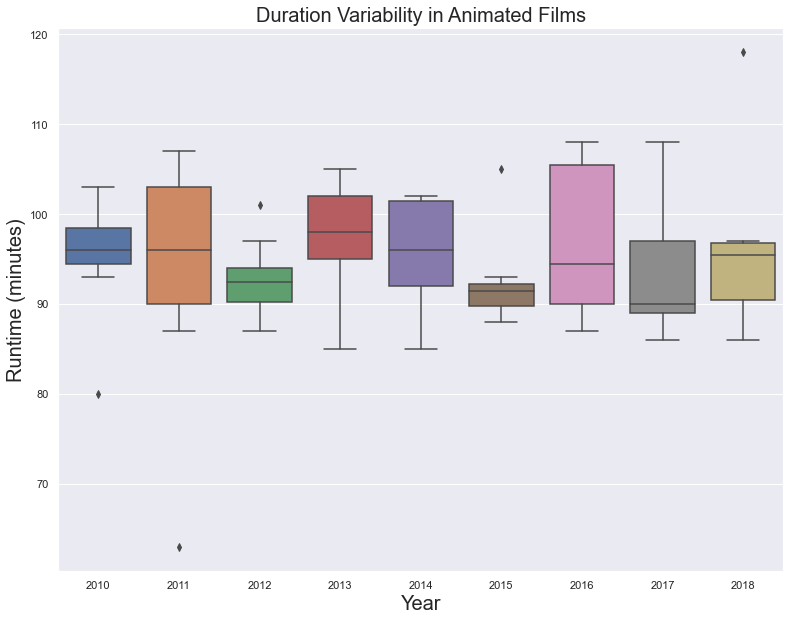

In [424]:
p = sns.boxplot(x=anima['start_year'],y=anima['runtime_minutes'])

plt.title('Duration Variability in Animated Films',fontsize=20)
p.set_xlabel('Year',fontsize=20)
p.set_ylabel('Runtime (minutes)',fontsize=20)
;

In [425]:
anima.head()

,title,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title_x,start_year,runtime_minutes,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,...,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,...,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
5,Tangled,BV,200800000.0,391000000.0,2010,tt0398286,Tangled,Tangled,2010,100.0,...,21.511,2010-11-24,7.5,6407,15,"Nov 24, 2010",Tangled,260000000.0,"$200,821,936",5.864772e+08
6,Despicable Me,Uni.,251500000.0,291600000.0,2010,tt1323594,Despicable Me,Despicable Me,2010,95.0,...,23.673,2010-07-09,7.2,10057,50,"Jul 9, 2010",Despicable Me,69000000.0,"$251,513,985",5.434646e+08
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,...,28.734,2010-03-26,7.7,7610,30,"Mar 26, 2010",How to Train Your Dragon,165000000.0,"$217,581,232",4.948710e+08


In [429]:
anima['release_date_x'] = pd.to_datetime(anima['release_date_x'])

C:\Users\harri\AppData\Local\Temp\ipykernel_32424\3899590899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anima['release_date_x'] = pd.to_datetime(anima['release_date_x'])


In [430]:
anima.head()

,title,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title_x,start_year,runtime_minutes,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,...,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,...,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
5,Tangled,BV,200800000.0,391000000.0,2010,tt0398286,Tangled,Tangled,2010,100.0,...,21.511,2010-11-24,7.5,6407,15,"Nov 24, 2010",Tangled,260000000.0,"$200,821,936",5.864772e+08
6,Despicable Me,Uni.,251500000.0,291600000.0,2010,tt1323594,Despicable Me,Despicable Me,2010,95.0,...,23.673,2010-07-09,7.2,10057,50,"Jul 9, 2010",Despicable Me,69000000.0,"$251,513,985",5.434646e+08
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,...,28.734,2010-03-26,7.7,7610,30,"Mar 26, 2010",How to Train Your Dragon,165000000.0,"$217,581,232",4.948710e+08


In [431]:
anima['month'] = anima['release_date_x'].dt.month

C:\Users\harri\AppData\Local\Temp\ipykernel_32424\2525340311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anima['month'] = anima['release_date_x'].dt.month


In [378]:
anima.head()

,title,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title_x,start_year,runtime_minutes,...,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross,month
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,...,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09,6
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,...,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08,5
5,Tangled,BV,200800000.0,391000000.0,2010,tt0398286,Tangled,Tangled,2010,100.0,...,2010-11-24,7.5,6407,15,"Nov 24, 2010",Tangled,260000000.0,"$200,821,936",5.864772e+08,11
6,Despicable Me,Uni.,251500000.0,291600000.0,2010,tt1323594,Despicable Me,Despicable Me,2010,95.0,...,2010-07-09,7.2,10057,50,"Jul 9, 2010",Despicable Me,69000000.0,"$251,513,985",5.434646e+08,7
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,...,2010-03-26,7.7,7610,30,"Mar 26, 2010",How to Train Your Dragon,165000000.0,"$217,581,232",4.948710e+08,3


C:\Users\harri\AppData\Local\Temp\ipykernel_32424\1411921855.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months)


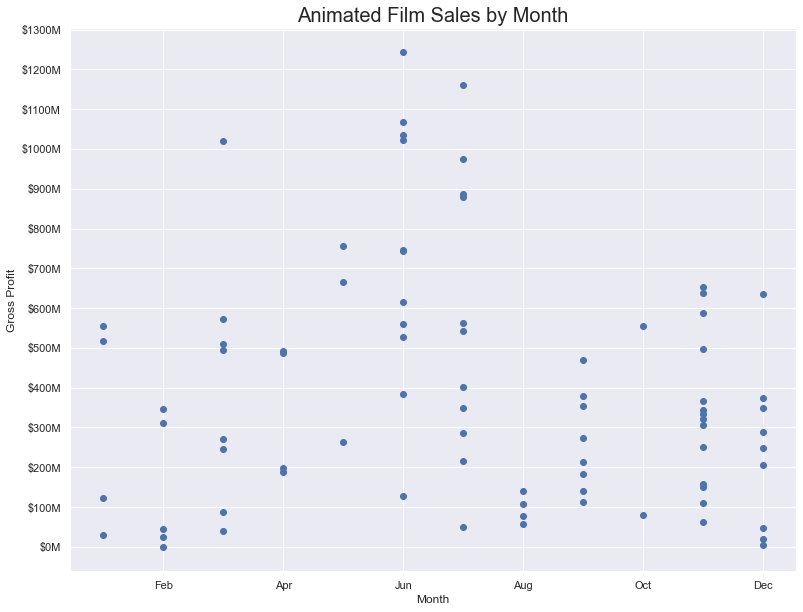

In [411]:
fig, ax = plt.subplots()
plt.scatter(anima['month'],anima['worldwide_gross'])
months = ['Jan', 'Feb', 'Apr', 'Jun',  'Aug', 'Oct', 'Dec', 'Jan']
ax.set_xticklabels(months)
ax.set_title('Animated Film Sales by Month', fontsize=20)
ax.set_xlabel('Month')
ax.set_ylabel('Gross Profit')
ax.set_yticks([x for x in np.arange(0,1400000000,100000000)])
ax.set_yticklabels(['$'+str(x)+'M' for x in np.arange(0,1400,100)]);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 1992
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              83 non-null     object 
 1   studio             83 non-null     object 
 2   domestic_gross_x   83 non-null     float64
 3   foreign_gross      81 non-null     float64
 4   year               83 non-null     int64  
 5   movie_id           83 non-null     object 
 6   primary_title      83 non-null     object 
 7   original_title_x   83 non-null     object 
 8   start_year         83 non-null     int64  
 9   runtime_minutes    82 non-null     float64
 10  genres             83 non-null     object 
 11  Unnamed: 0         83 non-null     int64  
 12  genre_ids          83 non-null     object 
 13  id_x               83 non-null     int64  
 14  original_language  83 non-null     object 
 15  original_title_y   83 non-null     object 
 16  popularity         83 non-